In [55]:
import SPOCK.long_term_scheduler as SPOCKLT
import SPOCK.short_term_scheduler as SPOCKST
import SPOCK.plots_scheduler as SPOCKplot
from astropy.time import Time
import pandas as pd
from astropy.utils import iers
import matplotlib.pyplot as plt
iers.IERS_A_URL  ='ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
import yaml
import sys
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML, display, clear_output, Javascript
from plotly import graph_objs as go
from IPython.display import Image
import os
from astropy import units as u
import datetime
from astroplan import Observer
%matplotlib notebook
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
#from astroplan import download_IERS_A
#download_IERS_A()


# LONG TERM SCHEDULER

In [5]:
# ---------------------- LONG TERM SCHEDULER ---------------------
obs = 2
schedule = SPOCKLT.Schedules()
schedule.load_parameters('./input.csv',obs)
#schedule.make_schedule(Altitude_constraint = 25, Moon_constraint = 30)


In [ ]:
display(schedule.target_table_spc[schedule.idx_first_target])
display(schedule.target_table_spc[schedule.idx_second_target])


In [ ]:
SPOCKLT.save_schedule('./input.csv',obs,save=True,over_write=True)

In [ ]:
schedule.telescope  = 'Artemis'
day = schedule.date_range[0]
SPOCKLT.make_np(day,4,schedule.telescope)
SPOCKLT.upload_plans(day, nb_days=4,telescope = schedule.telescope)

# SHORT TERM SCHEDULER

In [ ]:
with open('./input_short_term.csv', "r") as f:
    Inputs = yaml.load(f, Loader=yaml.FullLoader)
    df = pd.DataFrame.from_dict(Inputs['observatories'])
#::: observatory drowndown widget
observatory_w = widgets.Dropdown(
    options=df[1]['telescopes'],
    value='paranal_local',
    description='Observatory'
)
hbox1 = widgets.HBox([observatory_w])
display(hbox1)

In [ ]:
# ---------------------- SHORT TERM SCHEDULER ---------------------
obs = 1
schedule = SPOCKST.Schedules()
schedule.load_parameters('./input_short_term.csv',obs)

if schedule.use == 'follow_up':
    schedule.transit_follow_up('target_transit_follow_up.txt')
if schedule.use == 'special_start_end':
    input_name = 'Trappist-1b'
    schedule.special_target_with_start_end(input_name)
if schedule.use == 'special':
    input_name = 'Sp0938-2748'
    schedule.special_target(input_name)
if schedule.use == 'monitoring':
    input_name = 'Sp0755-2404'
    schedule.monitoring(input_name,5,61)

schedule.make_scheduled_table()
schedule.planification()
schedule.make_night_block()
SPOCKST.make_plans(day=schedule.day_of_night[0],nb_days=1,telescope=schedule.telescope)
schedule.scheduled_table

In [ ]:
SPOCKplot.airmass_plot_proposition(schedule.observatory.name,schedule.telescope,schedule.day_of_night[0])

In [ ]:
schedule.observatory.name = "Saint-Ex"

In [ ]:
schedule.scheduled_table_sorted


In [ ]:
SPOCKST.save_schedule('./input_short_term.csv',obs,save=True,over_write=True)

In [ ]:
day = schedule.day_of_night[0]
SPOCKST.make_np(day,1,schedule.telescope)
SPOCKST.upload_plans(day, nb_days=1,telescope = schedule.telescope)

# PLOT SCHEDULER

In [ ]:
# ---------------------- PLOT SCHEDULER ---------------------
day = Time('2020-01-09 15:00:00.000')


SPOCKplot.airmass_plot_saved(name_observatory='SSO',telescope='Io',day=day)
#SPOCKplot.airmass_altitude_plot_saved('SSO','Io',day)
#SPOCKplot.gantt_chart(day,day+1,['Artemis'])
#SPOCKplot.gantt_chart_all(schedule.target_list)
SPOCKplot.airmass_altitude_plot_given_target(name_observatory='SSO',day=day,target='Sp1048-1120',path_target_list=None)



In [6]:
SPOCKplot.gantt_chart_all(schedule.target_list)

In [ ]:
day = Time('2019-12-05 15:00:00.000')
SPOCKplot.gantt_chart(day,day+1,['Europa','Io','Callisto','Ganymede','Artemis','Saint-Ex'])

# Plots Meeting

In [56]:
# ---------------------- LONG TERM SCHEDULER ---------------------
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_sky
from astroplan import FixedTarget, Observer
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
obs = 2
schedule = SPOCKLT.Schedules()
schedule.load_parameters('./input.csv',obs)
df = schedule.target_table_spc
df

Sp_ID,2MASS_ID,Gaia_ID,Filter,texp_spc,nb_hours_surved,nb_hours_threshold,RA,DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_T1b,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,prog,Note
str11,str16,int64,str3,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str39,int64,str19
Sp0000-1245,00002867-1245153,2421137424841635840,I+z,0,0.0,100,0.1193751,-12.7542112,17.77,15.26,13.2,12.45,11.97,31.2782,0.2861,0.1,0.02,0.11,0.01,2743.0,105.0,6.6,1.0,9.37,3.83,1.39,[],3,0
Sp0001+1535,00011217+1535355,2772182900286956160,I+z,0,0.0,100,0.3007107,15.5932068,20.8,18.98,15.52,14.51,13.71,31.6163,1.8013,0.07,0.01,0.09,0.01,1891.0,116.0,12.5,1.2,2.86,2.42,1.61,[],3,0
Sp0002+0115,00020623+0115360,2738415592529108096,I+z,0,0.0,100,0.5259069000000001,1.2600395,16.34,14.22,12.17,11.54,11.13,20.81,0.0605,0.1,0.02,0.12,0.01,2749.0,105.0,6.5,1.0,14.19,4.48,1.82,[],3,output_list
Sp0004+5843,00040760+5843007,423130041883475968,I+z,0,0.0,100,1.0314046,58.716818,18.37,15.97,13.7,12.99,12.48,35.2116,0.4635,0.09,0.02,0.11,0.01,2626.0,106.0,7.4,1.1,6.28,3.19,1.18,[],3,0
Sp0004-4044,00043484-4044058,4996141155411984128,I+z,0,0.0,200,1.146191,-40.7351291,18.35,16.53,13.11,12.05,11.4,12.1811,0.0559,0.07,0.02,0.09,0.01,2041.0,105.0,11.4,1.1,11.26,6.52,4.18,[],1,0
Sp0004-2058,00044144-2058298,2340736324254735488,I+z,35,11.449000000000002,100,1.1730139,-20.9749664,16.87,15.55,12.4,11.83,11.4,15.0751,0.0367,0.08,0.02,0.11,0.01,2329.0,104.0,9.4,1.1,12.74,4.57,2.31,['Europa'],3,output_list
Sp0005+0217,00050184+0217120,2739077223651402240,I+z,0,0.0,100,1.2576252,2.2866248,17.83,15.83,13.69,13.06,12.68,39.0681,0.3398,0.09,0.02,0.12,0.01,2690.0,105.0,7.0,1.1,6.1,2.76,0.98,[],3,0
Sp0005-2157,00054844-2157196,2340605825968413184,I+z,0,0.0,100,1.4521621999999998,-21.9554899,17.63,15.98,13.27,12.62,12.2,25.3567,0.1052,0.08,0.02,0.11,0.01,2479.0,105.0,8.4,1.1,8.03,3.57,1.48,[],3,output_list
Sp0006+0439,00062623+0439115,2741783362285662592,I+z,0,0.0,100,1.6092862,4.6532415,17.02,15.16,12.96,12.35,12.01,27.2656,0.1225,0.09,0.02,0.12,0.01,2658.0,105.0,7.2,1.1,10.18,3.5,1.33,[],3,output_list


In [57]:
coords = SkyCoord(frame='icrs', ra=df['RA'], dec=df['DEC'],unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation) 
observed_on_going = np.where((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] ==0))
coords = SkyCoord(frame='icrs', ra=118, dec=-24,unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation)
coord_cartesian.x.value, coord_cartesian.y.value, coord_cartesian.z.value

(-0.42888361367542377, 0.8066127627927412, -0.4067366430758002)

In [58]:
halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]

degs, rads = 180/pi, pi/180

# do radians first, then convert later

nstars = 2000

ran1, ran2 = np.random.random(2*nstars).reshape(2, -1)

RA  = twopi * (ran1 - 0.5)
dec = np.arcsin(2.*(ran2-0.5)) # Hey Barry Carter!

funcs = [np.cos, np.sin]

cosRA,  sinRA  = [f(RA)  for f in funcs]
cosdec, sindec = [f(dec) for f in funcs]

x = cosRA * cosdec
y = sinRA * cosdec
z = sindec

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.

theta = np.linspace(0, twopi, 101)

costh, sinth = [f(theta) for f in funcs]
zerth = np.zeros_like(theta)

fig = plt.figure(figsize= [8, 8])

ax  = fig.add_subplot(1, 1, 1, projection='3d')

#ax.plot(x, y, z, '.k')

#for i in range(len(df)):
#plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='gainsboro',alpha=0.9, markersize=6,zorder=2,label='To be done')
#plt.plot(coord_cartesian[observed_on_going].x, coord_cartesian[observed_on_going].y, coord_cartesian[observed_on_going].z,'.', color='orange',alpha=0.9, markersize=6,zorder=3,label='On going')
#plt.plot(coord_cartesian[observed_done].x, coord_cartesian[observed_done].y, coord_cartesian[observed_done].z,'.', color='red',alpha=0.9, markersize=6,zorder=4,label='Done')
coords = SkyCoord(frame='icrs', ra=[df['RA'][418],df['RA'][418]+2], dec=[df['DEC'][418],df['DEC'][418]+2],unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation)
plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='pink',alpha=0.9, markersize=6,zorder=2,label='To be done')

    
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-1.1, 1.1)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)
ax.tick_params(axis="x", labelsize=12, labelcolor="k")
ax.tick_params(axis="y", labelsize=12, labelcolor="k")
ax.tick_params(axis="z", labelsize=12, labelcolor="k")
ax.view_init(elev=20, azim=47)

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.
# lines of declination
xvals = costh * np.cos(decs)[:, None]
yvals = sinth * np.cos(decs)[:, None]
zvals = zerth + np.sin(decs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)

# lines of Right Ascention
xvals = costh * np.cos(RAs)[:, None]
yvals = costh * np.sin(RAs)[:, None]
zvals = sinth + np.zeros_like(RAs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)
plt.legend(fontsize='xx-large')

plt.savefig('./SPOCK_Figures/All_sky_cartesian_done_or not.pdf')

<IPython.core.display.Javascript object>

In [59]:
halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]

degs, rads = 180/pi, pi/180

# do radians first, then convert later

nstars = 2000

ran1, ran2 = np.random.random(2*nstars).reshape(2, -1)

RA  = twopi * (ran1 - 0.5)
dec = np.arcsin(2.*(ran2-0.5)) # Hey Barry Carter!

funcs = [np.cos, np.sin]

cosRA,  sinRA  = [f(RA)  for f in funcs]
cosdec, sindec = [f(dec) for f in funcs]

x = cosRA * cosdec
y = sinRA * cosdec
z = sindec

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.

theta = np.linspace(0, twopi, 101)

costh, sinth = [f(theta) for f in funcs]
zerth = np.zeros_like(theta)


fig = plt.figure(figsize= [14, 14])

ax  = fig.add_subplot(1, 1, 1, projection='3d')

io = []
europa = []
ganymede = []
callisto = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        io.append(i)
    if 'Europa' in df['telescope'][i]:
        europa.append(i)
    if 'Ganymede' in df['telescope'][i]:
        ganymede.append(i)
    if 'Callisto' in df['telescope'][i]:
        callisto.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)

#for i in range(len(df)):
plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='gainsboro',alpha=0.5,markersize=8, linewidth=0.8,zorder=2,label='Remaining')
plt.plot(coord_cartesian[trappist].x, coord_cartesian[trappist].y, coord_cartesian[trappist].z,'.', color='purple',alpha=0.5, markersize=8,zorder=3,label='TRAPPIST')

plt.plot(coord_cartesian[io].x, coord_cartesian[io].y, coord_cartesian[io].z,'.', color='red',alpha=0.5, markersize=8,zorder=3,label='Io')
plt.plot(coord_cartesian[europa].x, coord_cartesian[europa].y, coord_cartesian[europa].z,'.', color='blue',alpha=0.5, markersize=8,zorder=4,label='Europa')
plt.plot(coord_cartesian[ganymede].x, coord_cartesian[ganymede].y, coord_cartesian[ganymede].z,'.', color='orange',alpha=0.5, markersize=8,zorder=4,label='Ganymede')
plt.plot(coord_cartesian[callisto].x, coord_cartesian[callisto].y, coord_cartesian[callisto].z,'.', color='turquoise',alpha=0.5, markersize=8,zorder=4,label='Callisto')

plt.plot(coord_cartesian[artemis].x, coord_cartesian[artemis].y, coord_cartesian[artemis].z,'.', color='green',alpha=0.5, markersize=8,zorder=4,label='Artemis')
plt.plot(coord_cartesian[saint_ex].x, coord_cartesian[saint_ex].y, coord_cartesian[saint_ex].z,'.', color='gold',alpha=0.5, markersize=8,zorder=4,label='Saint-Ex')


ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_zlim(-1.1,1.1)


decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.
# lines of declination
xvals = costh * np.cos(decs)[:, None]
yvals = sinth * np.cos(decs)[:, None]
zvals = zerth + np.sin(decs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)

# lines of Right Ascention
xvals = costh * np.cos(RAs)[:, None]
yvals = costh * np.sin(RAs)[:, None]
zvals = sinth + np.zeros_like(RAs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.7, linewidth=0.8,zorder=1)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)
ax.tick_params(axis="x", labelsize=12, labelcolor="dimgrey")
ax.tick_params(axis="y", labelsize=12, labelcolor="dimgrey")
ax.tick_params(axis="z", labelsize=12, labelcolor="dimgrey")
ax.view_init(elev=1, azim=47)
plt.legend(fontsize='xx-large')
plt.savefig('./SPOCK_Figures/All_sky_cartesian_which_telescope.pdf')

import plotly.tools as tls

import matplotlib.animation as animation
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
#ani = animation.FuncAnimation(fig, fig_GIF,frames=2000, interval=20, blit=True)



<IPython.core.display.Javascript object>

IndexError: index 131 is out of bounds for axis 0 with size 2

In [ ]:
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_sky
from astroplan import FixedTarget, Observer

location = EarthLocation.from_geodetic(-70.40300000000002*u.deg, -24.625199999999996*u.deg,2635.0000000009704*u.m)
observatory = Observer(location=location, name="SSO", timezone="UTC")
observed_on_going = np.where((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100))
observed_done = np.where((df['nb_hours_surved'] > 100))
#to_be_done = np.where((df['nb_hours_surved'] == 0))
targets_on_going = [FixedTarget(coord=coords[i],name=df['Sp_ID'][observed_on_going][i]) for i in range(len(df[observed_on_going]))]
targets_done = [FixedTarget(coord=coords[i],name=df['Sp_ID'][observed_done][i]) for i in range(len(df[observed_done]))]

observe_time = Time(['2020-01-16T00:00:00'])
not_done = {'color': 'gainsboro'}
done = {'color': 'red'}
on_going = {'color': 'orange'}

plt.figure()
plot_sky(targets, observatory, observe_time,style_kwargs=not_done)
plot_sky(targets_done, observatory, observe_time,style_kwargs=done)
#plot_sky(targets_on_going, observatory, observe_time,style_kwargs=on_going)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [ ]:
df['RA'][418]

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
plt.figure(figsize=(8,6))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
observed_on_going = np.where(((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100)))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] == 0))

plt.plot(df['RA'][observed_on_going], df['DEC'][observed_on_going], 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='On going (#' + str(len(df['RA'][observed_on_going])) + ')' )
plt.plot(df['RA'][to_be_done], df['DEC'][to_be_done], 'o', markersize=5, alpha=0.3,color='gray',zorder=1,label='To be done (#' + str(len(df['RA'][to_be_done])) + ')')
plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=12, labelcolor="k")
ax.tick_params(axis="y", labelsize=12, labelcolor="k")
#plt.legend(fontsize='xx-large',loc=4)
plt.grid(True)

plt.savefig('./SPOCK_Figures/All_sky_nb_hours_archived.pdf')
plt.show()

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
plt.figure(figsize=(10,8))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
plt.grid(True)
io = []
europa = []
ganymede = []
callisto = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        io.append(i)
    if 'Europa' in df['telescope'][i]:
        europa.append(i)
    if 'Ganymede' in df['telescope'][i]:
        ganymede.append(i)
    if 'Callisto' in df['telescope'][i]:
        callisto.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)
#plt.plot(coords[io].ra, coords[io].dec, 'o', markersize=5, alpha=0.8,color='red',zorder=2,label='Io')
plt.plot(df['RA'][europa], df['DEC'][europa], 'o', markersize=5, alpha=0.8,color='blue',zorder=2,label='Europa' )
plt.plot(df['RA'][ganymede], df['DEC'][ganymede], 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='Ganymede')
plt.plot(df['RA'][callisto], df['DEC'][callisto], 'o', markersize=5, alpha=0.8,color='turquoise',zorder=2,label='Callisto')
plt.plot(df['RA'][artemis], df['DEC'][artemis], 'o', markersize=5, alpha=0.8,color='green',zorder=2,label='Artemis')
plt.plot(df['RA'][trappist], df['DEC'][trappist], 'o', markersize=5, alpha=0.8,color='purple',zorder=2,label='TRAPPIST')

plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.legend(fontsize='xx-large',loc=4)
plt.savefig('./SPOCK_Figures/All_sky_telescope.pdf')
plt.show()

In [ ]:
# ---------------------- LONG TERM SCHEDULER ---------------------
from astropy.table import Table
df_read = pd.read_csv('speculoos_target_list_webupdate.txt', delimiter=' ')
df = Table.from_pandas(df_read)

c = [SkyCoord(str(df['RA1'][i]) + ' ' +  str(df['RA2'][i]) + ' ' + str(round(df['RA3'][i])) + ' ' + str(df['DEC1'][i]) + ' ' + str(df['DEC2'][i]) + ' ' + str(round(df['DEC3'][i])), unit=(u.hourangle, u.deg)) for i in range(len(df))]

c

In [ ]:
c[list(observed_done[0])]

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
plt.figure(figsize=(14,12))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
plt.grid(True)
observed_on_going = np.where(((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100)))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] == 0))
plt.plot(c[observed_done].ra, c[observed_done].dec, 'o', markersize=5, alpha=0.8,color='red',zorder=2,label='Done (#' + str(len(df['RA'][observed_done])) + ')' )
plt.plot(c[observed_on_going].ra, c[observed_on_going].dec, 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='On going (#' + str(len(df['RA'][observed_on_going])) + ')' )
plt.plot(c[to_be_done].ra, c[to_be_done].dec, 'o', markersize=5, alpha=0.3,color='gray',zorder=1,label='To be done (#' + str(len(df['RA'][to_be_done])) + ')')
plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.legend(fontsize='xx-large',loc=4)
plt.show()

<IPython.core.display.Javascript object>


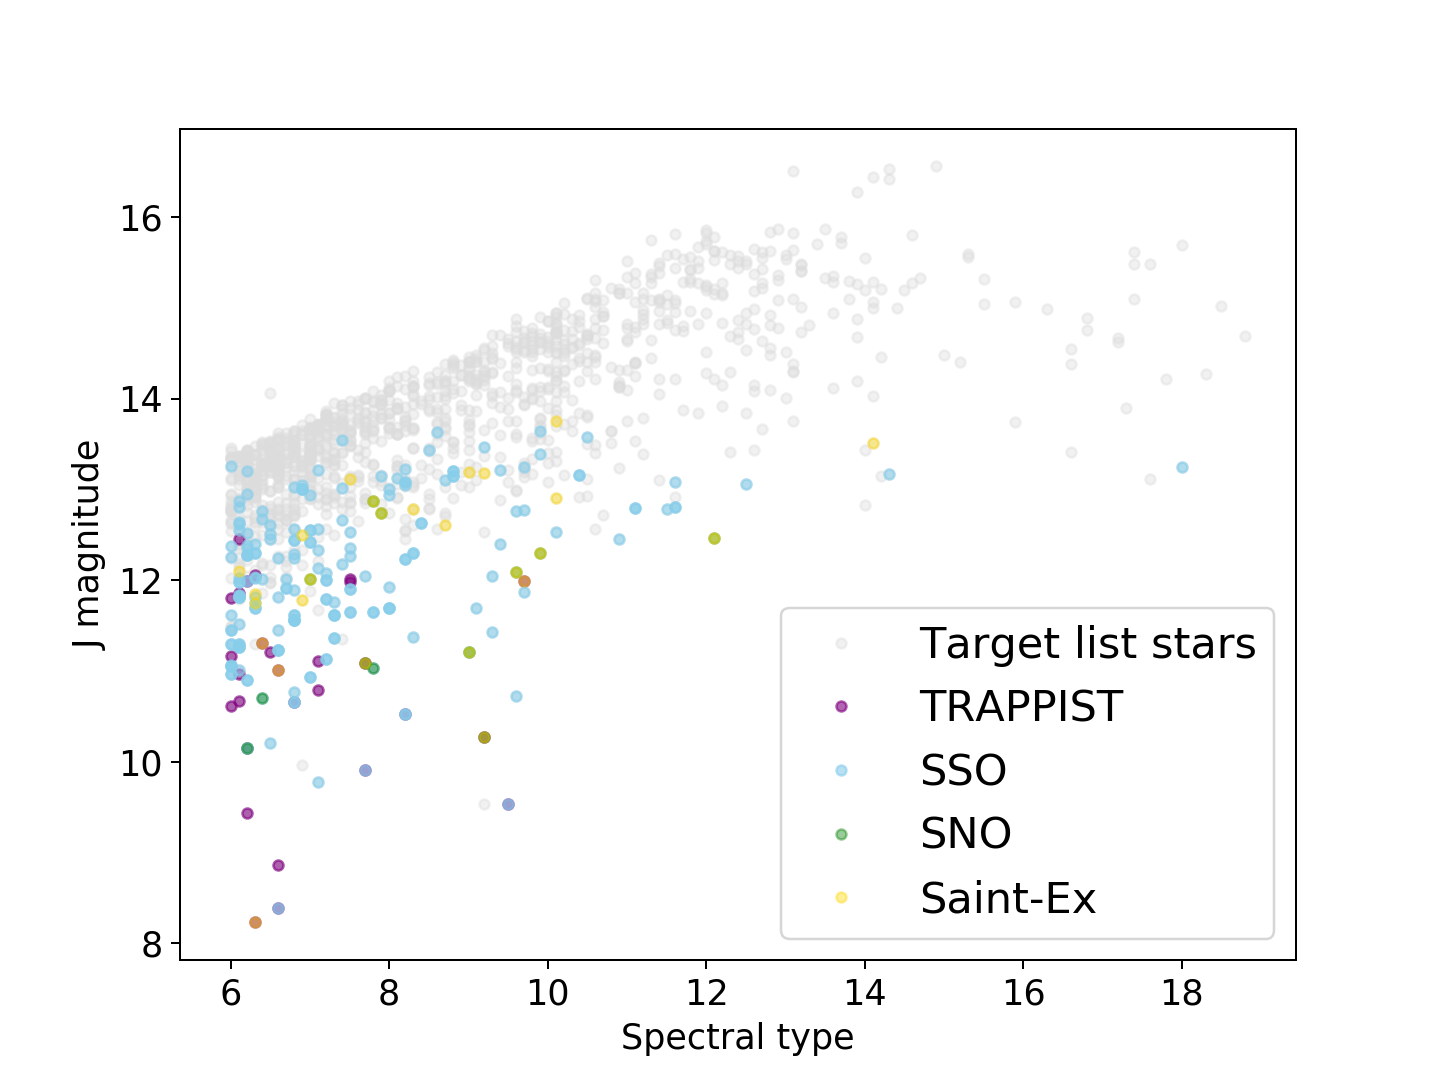

In [6]:
program1 = np.where((df['prog']==1))
program2 = np.where((df['prog']==2))
program3 = np.where((df['prog']==3))
sso = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        sso.append(i)
    if 'Europa' in df['telescope'][i]:
        sso.append(i)
    if 'Ganymede' in df['telescope'][i]:
        sso.append(i)
    if 'Callisto' in df['telescope'][i]:
        sso.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)

plt.figure(figsize=(8,6))
ax = plt.gca()
#plt.plot(df['SpT'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,color='orange',label='on going',zorder=2)
#plt.plot(df['SpT'][observed_done],df['J'][observed_done],'.',markersize=8,color='red',label='done',zorder=2)
plt.plot(df['SpT'],df['J'],'.',markersize=8,color='gainsboro',alpha=0.4,zorder=1,label='Target list stars')
#plt.plot(df['SpT'][to_be_done],df['J'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#plt.plot(df['SpT'][program1],df['J'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#plt.plot(df['SpT'][program2],df['J'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#plt.plot(df['SpT'][program3],df['J'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

plt.plot(df['SpT'][trappist],df['J'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
plt.plot(df['SpT'][sso],df['J'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
plt.plot(df['SpT'][artemis],df['J'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
plt.plot(df['SpT'][saint_ex],df['J'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')


plt.legend(fontsize='xx-large',loc=4)
ax.set_xlabel('Spectral type',fontsize=14)
ax.set_ylabel('J magnitude',fontsize=14)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.savefig('Spt_vs_Jmag_telescope.pdf')
plt.show()

<IPython.core.display.Javascript object>


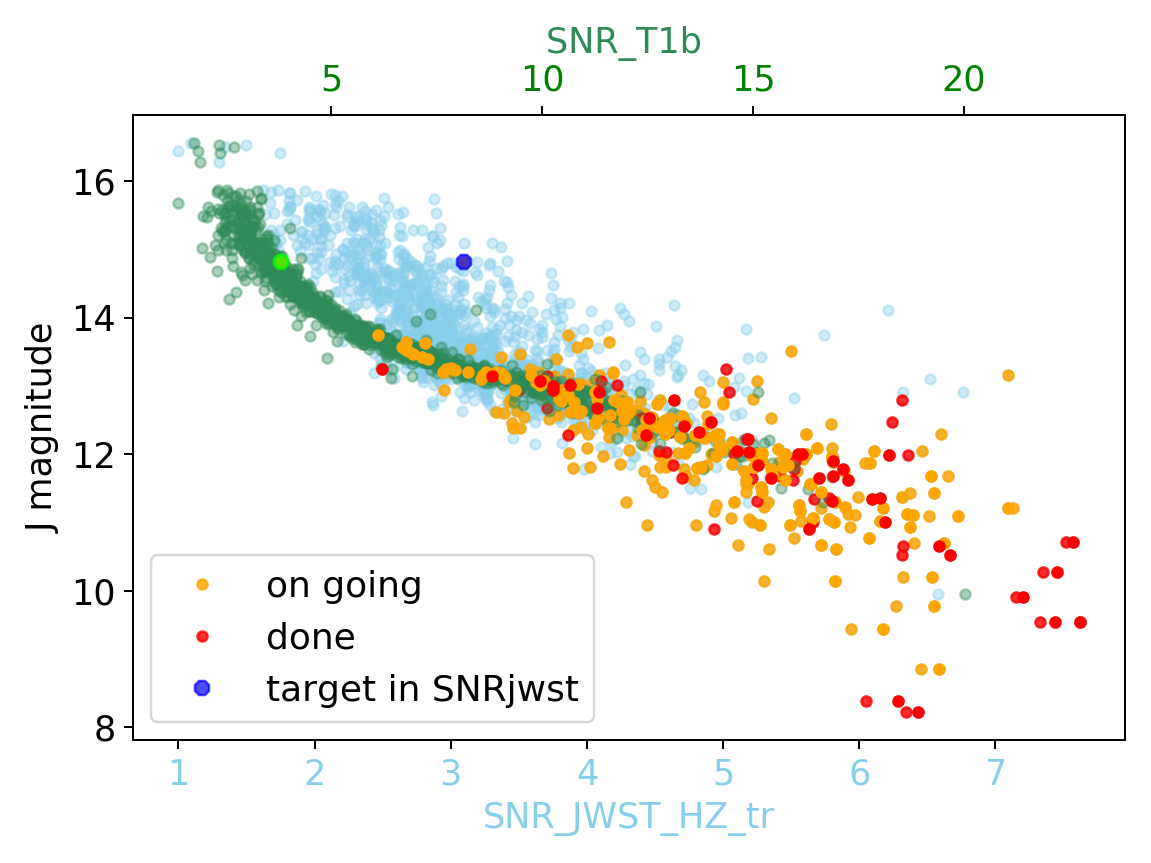

In [88]:
target_name = 'Sp0823+6125'
target_idx = np.where((df['Sp_ID'] == target_name))


fig, ax1 = plt.subplots()
ax1.plot(df['SNR_JWST_HZ_tr'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,alpha=0.8,color='orange',label='on going',zorder=2)
ax1.plot(df['SNR_JWST_HZ_tr'][observed_done],df['J'][observed_done],'.',markersize=8,alpha=0.8,color='red',label='done',zorder=3)
ax1.plot(df['SNR_JWST_HZ_tr'],df['J'],'.',markersize=8,color='skyblue',alpha=0.4,zorder=1)
ax1.plot(df['SNR_JWST_HZ_tr'][target_idx],df['J'][target_idx],'8',markersize=6,color='blue',alpha=0.7,zorder=3,label="target in SNRjwst")
#ax1.plot(df['SNR_JWST_HZ_tr'][to_be_done],df['J'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program1],df['J'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program2],df['J'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program3],df['J'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

ax1.set_xlabel('SNR_JWST_HZ_tr',fontsize=14,color='skyblue')
ax1.set_ylabel('J magnitude',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='skyblue')
ax1.legend(fontsize='x-large',loc=3)
ax2 = ax1.twiny()
ax2.plot(df['SNR_T1b'],df['J'],'.',markersize=8,color='seagreen',alpha=0.4,zorder=1)
ax2.plot(df['SNR_T1b'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,color='orange',label='on going',zorder=3)
ax2.plot(df['SNR_T1b'][observed_done],df['J'][observed_done],'.',markersize=8,color='red',label='done',zorder=3)
ax2.plot(df['SNR_T1b'][target_idx],df['J'][target_idx],'8',markersize=6,color='lime',alpha=0.7,zorder=3,label="target in SNRt1b")

ax2.set_xlabel('SNR_T1b ',fontsize=14,color="seagreen")
ax2.set_ylabel('J magnitude',fontsize=14)
ax2.tick_params(axis="x", labelsize=14, labelcolor="seagreen")



#plt.plot(df['SNR_JWST_HZ_tr'][trappist],df['J'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
#plt.plot(df['SNR_JWST_HZ_tr'][sso],df['J'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
#plt.plot(df['SNR_JWST_HZ_tr'][artemis],df['J'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
#plt.plot(df['SNR_JWST_HZ_tr'][saint_ex],df['J'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')
ax2.tick_params(axis='x', labelcolor='green')
#ax2.legend(fontsize='x-large',loc=3)
fig.tight_layout()
plt.savefig('Spt_vs_SNRs_archived.pdf')
plt.show()

In [69]:
np.where((df['SNR_T1b'] == min(df['SNR_T1b'][observed_on_going]))),\
np.where((df['SNR_T1b'][observed_on_going] == min(df['SNR_T1b'][observed_on_going]))),observed_on_going[0][52],\
df['Sp_ID'][448]



((array([448, 501, 631]),), (array([52]),), 448, 'Sp0823+6125')

In [73]:

idx = np.where((df['SNR_JWST_HZ_tr'][observed_done] == min(df['SNR_JWST_HZ_tr'][observed_done])))
idx_in_df = observed_done[0][idx][0]
np.where((df['SNR_JWST_HZ_tr'] == min(df['SNR_JWST_HZ_tr'][observed_done]))),df['Sp_ID'][idx_in_df]



((array([   8,  309,  592,  874, 1022]),), 'Sp1054-3445')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<IPython.core.display.Javascript object>


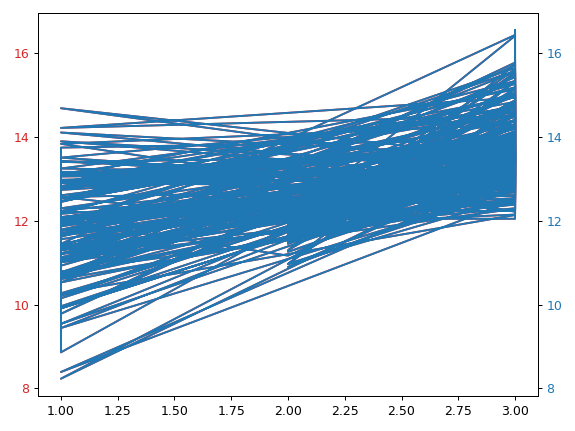

In [7]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(df['prog'],df['J'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(df['prog'], df['J'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [8]:
faint = np.where((df['J'] > 12.8))
len(df['J'][faint]),len(df['J'])

(1059, 1312)

In [9]:
from docx import Document

document = Document()
document.save('test.docx')

In [10]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Schedule from ', 0)

p = document.add_paragraph('Operator is charge is ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)


document.save('demo.docx')

In [11]:
from docx import Document
from docx.shared import *
from docx.enum.text import *

doc = Document()
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
par_format.space_after = Pt(6)
run = par.add_run('       TRAPPIST-South          ')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(16)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
run = par.add_run('Schedule from 10 Jul 2017 to 12 Jul 2017 ')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(16)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
run = par.add_run('(Total time = 0hr, technical loss = 0hr, weather loss = 0hr, Exotime = 0hr, cometime = 0hr, chilean time = 0hr)')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(12)
font.color.rgb = RGBColor(255, 0, 0)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
par_format.space_after = Pt(6)
run = par.add_run('[Michael]')
run.italic = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(12)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
#doc.add_page_break()
#doc.add_picture('a.png',width=Inches(6.0))
doc.save('test.docx')


In [12]:
from docx import Document
from docx.shared import *
from docx.enum.text import *
from astropy.table import Table

obs = 5
schedule = SPOCKLT.Schedules()
schedule.load_parameters('./input.csv',obs)
df = schedule.target_table_spc

date_range = schedule.date_range
observatory = schedule.observatory
telescope =schedule.telescope

def read_night_block(telescope,day):
    day_fmt = Time(day, scale='utc', out_subfmt='date').tt.datetime.strftime("%Y-%m-%d")
    scheduler_table = Table.read('./DATABASE/' + str(telescope) +'/night_blocks_'+ str(telescope) +'_' + str(day_fmt)+'.txt', format='ascii')
    return scheduler_table    

def make_docx_schedule(observatory,date_range,name_operator):
    
    nb_day_date_range  =  date_range_in_days(date_range)
    telescope =schedule.telescope
    doc = Document()
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt( 6)
    run = par.add_run(observatory.name)
    run.bold = True
    font = run.font
    font.size = Pt(16)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(12)
    run = par.add_run('Schedule from ' + Time(date_range[0], out_subfmt='date').value + ' to ' + Time(date_range[1], out_subfmt='date').value)
    run.bold = True
    font = run.font
    font.size = Pt(16)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(12)
    run = par.add_run('(Total time = 0hr, technical loss = 0hr, weather loss = 0hr, Exotime = 0hr, cometime = 0hr,   chilean time = 0hr)')
    run.bold = True
    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(255,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(20)
    run = par.add_run(name_operator)
    run.italic = True
    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.space_before = Pt(16)
    par_format.space_after = Pt( 0)
        
    for i in range(0,8):
        
        date = date_range[0] + i
        read_night_block(telescope,date)
        
        table_schedule = read_night_block(telescope,date)
        idx_target = [np.where(( df['Sp_ID'] == table_schedule['target'][i])) for i in range(len(table_schedule))]

        sun_set = observatory.sun_set_time(date,which='next').iso 
        sun_rise = observatory.sun_rise_time(date,which='next').iso  
        moon_illumination = int(round(astroplan.moon_illumination(date)*100,0)) *u.percent
        civil_twilights = [Time(observatory.twilight_evening_civil(date ,which='next')).iso,Time(observatory.twilight_morning_civil(date +1 ,which='nearest')).iso]
        nautic_twilights = [Time(observatory.twilight_evening_nautical(date ,which='next')).iso,Time(observatory.twilight_morning_nautical(date +1 ,which='nearest')).iso]
        astro_twilights =[Time(observatory.twilight_evening_astronomical(date ,which='next')).iso,Time(observatory.twilight_morning_astronomical(date +1 ,which='nearest')).iso]
        start_night = table_schedule['start time (UTC)'][0]
        end_night = table_schedule['end time (UTC)'][-1]
        night_duration = round((Time(end_night) - Time(start_night)).jd * 24,3) * u.hour
        

        run = par.add_run('Night starting on the ' + Time(date, out_subfmt='date').value)
        run.bold = True
        run.underline = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Moon illumination: ' + str(moon_illumination) )
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Sunset /  Sunrise: ' + Time(sun_set, out_subfmt='date_hm').value + '  / '  + Time(sun_rise, out_subfmt='date_hm').value)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Civil/Naut./Astro. twilights: ' + Time(civil_twilights[0], out_subfmt='date_hm').value +  '/' + Time(civil_twilights[1], out_subfmt='date_hm').value +\
                          ' , ' + Time(nautic_twilights[0], out_subfmt='date_hm').value +  '/' + Time(nautic_twilights[1], out_subfmt='date_hm').value+\
                          ' , ' + Time(astro_twilights[0], out_subfmt='date_hm').value +  '/' + Time(astro_twilights[1], out_subfmt='date_hm').value)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Start-end of night (Naut. twil.): ' + start_night + ' to ' + end_night)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 3)
        run = par.add_run('Night duration (Naut. twil.): ' + str(night_duration))
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        
        
        for i in range(len(table_schedule)):
            idx_target = np.where(( df['Sp_ID'] == table_schedule['target'][i]))
            start_time_target = table_schedule['start time (UTC)'][i]
            end_time_target = table_schedule['end time (UTC)'][i]
            config = table_schedule['configuration'][i]
            dist_moon =  '34'
            
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('From ' + Time(start_time_target, out_subfmt='date_hm').value  +  ' to ' + Time(end_time_target, out_subfmt='date_hm').value   + ' : ' + str(df['Sp_ID'][idx_target].data.data[0]))
            run.bold = True
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('  Note: Prio_target                                         ')
            font = run.font
            font.size = Pt(10)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('  SPECULOOS : '  + str(df['nb_hours_surved'][idx_target].data.data[0]) +  ' hours of obs over '  + str(df['nb_hours_threshold'][idx_target].data.data[0]) )
            font = run.font
            font.size = Pt(10)
            font.color.rgb = RGBColor(  0,  0,  0) 
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('Jmag= ' + str(df['J'][idx_target].data.data[0]) + ',  SpT= ' + str(df['SpT'][idx_target].data.data[0]) )#+ ', Moon at ' + str(dist_moon))
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 3)
            run = par.add_run('  RA='  + str(round(df['RA'][idx_target].data.data[0],2) * u.degree) + ', DEC= ' + str(round(df['DEC'][idx_target].data.data[0],2)  * u.degree) + ', Config: ' + str(config) )
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt(16)
        par_format.space_after = Pt( 0)

    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(  0,  0,  0)
    doc.save('schedule.docx')


def date_range_in_days(date_range):
    date_format = "%Y-%m-%d %H:%M:%S.%f"
    date_start = datetime.datetime.strptime(date_range[0].value, date_format)
    date_end = datetime.datetime.strptime(date_range[1].value, date_format)
    date_range_in_days = (date_end - date_start).days
    return date_range_in_days  
                              
                              
make_docx_schedule(observatory,date_range,'Khalid')

KeyboardInterrupt: 